In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [77]:
with open('./GroundSight/Python/data.txt', 'r') as f:
    data = [line.rstrip('\n').split(',') for line in f.readlines()]


In [78]:
unzipped = list(zip(*data))
ts = np.array(list(map(int, unzipped[0])))
ys = np.array(list(map(float, unzipped[1])))

In [99]:
# Find sampling rate (seconds)
sampling_period = 0
for i in range(ts.shape[0]-1):
    sampling_period += abs(ts[i + 1] - ts[i])

sampling_period /= ts.shape[0] - 1 # Microseconds
print(sampling_period)
sampling_period /= 1.e6 # Seconds

sampling_frequency = 1/sampling_period
print(f'Sampling frequency: {sampling_frequency:.2f} Hz')

210330.15495867768
Sampling frequency: 4.75 Hz


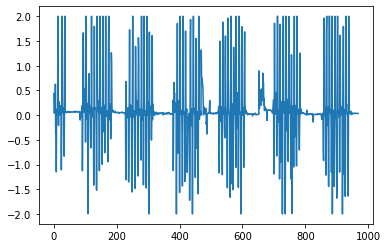

In [100]:
# Slicing
plt.plot(range(ts.shape[0]), ys)

(-2.0, 2.0)

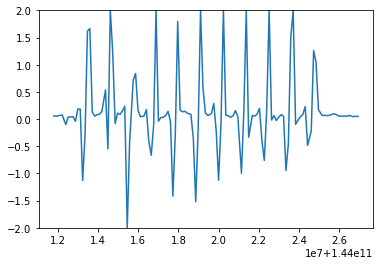

In [101]:
# Desired slice
sl = slice(80, 200)
plt.plot(ts[sl], ys[sl])
plt.ylim(-2, 2)

In [102]:
def butter_lowpass(cutoff, fs, order=4):
    return signal.butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

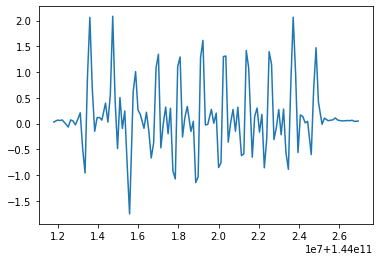

In [114]:
# Filter requirements.
order = 4
fs = sampling_frequency      # sample rate, Hz
cutoff = 2  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
y = butter_lowpass_filter(ys[sl], cutoff, fs, order)

plt.plot(ts[sl], y)